In [65]:
import pandas as pd 
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [66]:
df = pd.read_csv('Churn_Modelling.csv')

In [67]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [69]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [70]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [71]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [72]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
NumOfProducts,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
HasCrCard,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
IsActiveMember,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
EstimatedSalary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Exited,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [73]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

<AxesSubplot:ylabel='Exited'>

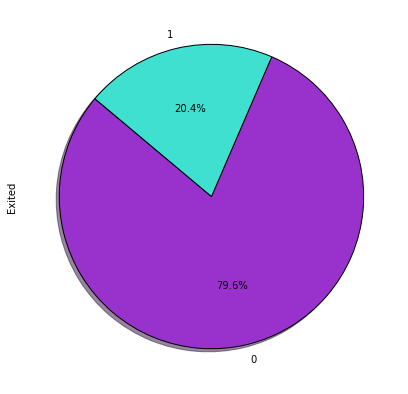

In [76]:
df['Exited'].value_counts().plot(kind = 'pie',
                                autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=140)

In [77]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
X.select_dtypes('object')

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [79]:
ohe = OneHotEncoder()
ohe.fit(X[['Geography','Gender']])
XT = ohe.transform(X[['Geography','Gender']])

In [80]:
XT

,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2
0,1,0,0,1,0
1,0,1,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,1,0,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,0,1,0,1


In [81]:
X.drop(columns =['Geography','Gender'], inplace = True)

In [82]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [83]:
pd.concat([X,XT],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2,Geography_3,Gender_1,Gender_2
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,0,1,0,1


In [84]:
px.imshow(X.corr(),text_auto=True)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42,stratify= y)

In [86]:
Sscaler = StandardScaler()
X_train_Sscaler= Sscaler.fit_transform(X_train)
X_test_Sscaler = Sscaler.transform(X_test)

In [87]:
list(range(1,16,2))

[1, 3, 5, 7, 9, 11, 13, 15]

In [106]:
from sklearn.model_selection import GridSearchCV
grid_pramiter = {'n_neighbors': list(range(1,16,2))}
neigh = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=neigh,param_grid=grid_pramiter,scoring= 'accuracy', cv =10)
grid_search = grid_search.fit(X_train_Sscaler, y_train)

In [107]:
grid_search.best_score_

0.842375

In [108]:
grid_search.best_params_

{'n_neighbors': 15}

In [115]:
neigh = KNeighborsClassifier(n_neighbors = 15)
neigh.fit(X_train_Sscaler, y_train)
y_pred = neigh.predict(X_test_Sscaler)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8385

### or manualy

**but k in grid search is 15 and manualy is 9 , is the deffirant cv = 10 (cross validation) or somesing else ?**

In [28]:
error_test = []
k_value = []
error_trian = []
# for i in range(1, 10, 2): or
    

for i in range(1,16,2):
        k_value.append(i)
        
        neigh.fit(X_train_Sscaler, y_train)
        y_pred = neigh.predict(X_test_Sscaler)
        
        error_test.append(1-accuracy_score(y_test, y_pred))
        y_pred_tra = neigh.predict(X_train_Sscaler)
        error_trian.append(1-accuracy_score(y_train, y_pred_tra))
                     

In [29]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Test data", "Train data"))
fig.add_trace(
    go.Scatter(x = k_value,y= error_test),
    row=1, col=1
    
)

fig.add_trace(
    go.Scatter(x=k_value, y=error_trian),
    row=1, col=2
)
fig.update_xaxes(title_text="K value", row=1, col=1)
fig.update_yaxes(title_text="error value", row=1, col=1)

fig.update_xaxes(title_text="K value", row=1, col=2)
fig.update_yaxes(title_text="error value", row=1, col=2)

In [30]:
error_test = []
k_value = []
error_trian = []
# for i in range(1, 10, 2): or
    

for i in range(1,16,2):
        k_value.append(i)
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(X_train_Sscaler, y_train)
        y_pred = neigh.predict(X_test_Sscaler)
        
        error_test.append(accuracy_score(y_test, y_pred))
        y_pred_tra = neigh.predict(X_train_Sscaler)
        error_trian.append(accuracy_score(y_train, y_pred_tra))
                     

In [31]:
fig = make_subplots(rows=1, cols=2,subplot_titles=("Test data", "Train data"))
fig.add_trace(
    go.Scatter(x = k_value,y= error_test),
    row=1, col=1
    
)

fig.add_trace(
    go.Scatter(x=k_value, y=error_trian),
    row=1, col=2
)
fig.update_xaxes(title_text="K value", row=1, col=1)
fig.update_yaxes(title_text="accuricy value", row=1, col=1)

fig.update_xaxes(title_text="K value", row=1, col=2)
fig.update_yaxes(title_text="accuricy value", row=1, col=2)